In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

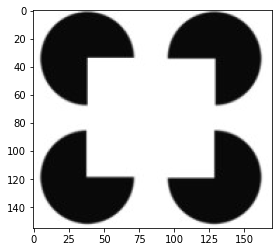

In [2]:
img = cv.imread("corner.jpg",0)
plt.imshow(img,cmap="gray")

Text(0.5, 1.0, 'guassian blured gray scale')

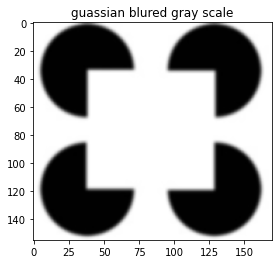

In [3]:
I = cv.GaussianBlur(img,(5,5),0)
plt.imshow(I,cmap="gray")
plt.title("guassian blured gray scale")

In [4]:
Ix = cv.Sobel(I,cv.CV_64F,1,0,ksize=5)  # x
Iy = cv.Sobel(I,cv.CV_64F,0,1,ksize=5)  # y

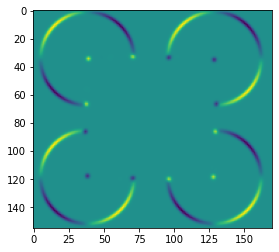

In [5]:
Ix_sqr = np.zeros((I.shape[0], I.shape[1]), dtype = int)
Iy_sqr = np.zeros((I.shape[0], I.shape[1]), dtype = int)
Ix_Iy = np.zeros((I.shape[0], I.shape[1]), dtype = int)


for i in range(0, I.shape[0]):
    for j in range(0, I.shape[1]):
        Ix_sqr[i,j]=Ix[i,j]*Ix[i,j]
        
for i in range(0, I.shape[0]):
    for j in range(0, I.shape[1]):
        Iy_sqr[i,j]=Iy[i,j]*Iy[i,j]

for i in range(0, I.shape[0]):
    for j in range(0, I.shape[1]):
        Ix_Iy[i,j]=Ix[i,j]*Iy[i,j]
plt.imshow(Ix_Iy)

In [6]:
G = [[1/16,2/16,1/16],[2/16,4/16,2/16],[1/16,2/16,1/16]]

In [7]:

a=0
b=0

Ix_sqr_PaddedImage = np.zeros((I.shape[0]+2,I.shape[1]+2),dtype=np.float64)
for i in range(1, I.shape[0] + 1):
    b=0
    for j in range(1, I.shape[1] + 1):
        Ix_sqr_PaddedImage[i][j]=Ix_sqr[a][b]
        b=b+1
    a=a+1


In [8]:
Iy_sqr_PaddedImage = np.zeros((I.shape[0]+2,I.shape[1]+2),dtype=np.float64)
a=0
b=0
for i in range(1, I.shape[0] + 1):
    b=0
    for j in range(1, I.shape[1] + 1):
        Iy_sqr_PaddedImage[i][j]=Iy_sqr[a][b]
        b=b+1
    a=a+1

In [9]:
Ix_Iy_PaddedImage = np.zeros((I.shape[0]+2,I.shape[1]+2),dtype=np.float64)
a=0
b=0
for i in range(1, I.shape[0] + 1):
    b=0
    for j in range(1, I.shape[1] + 1):
        Ix_Iy_PaddedImage[i][j]=Ix_Iy[a][b]
        b=b+1
    a=a+1

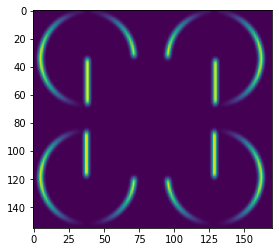

In [10]:
GIx_sqr = np.zeros((I.shape[0], I.shape[1]), dtype = int)
GIy_sqr = np.zeros((I.shape[0], I.shape[1]), dtype = int)
GIx_Iy = np.zeros((I.shape[0], I.shape[1]), dtype = int)

a=0
b=0
sum=0
for i in range(1, I.shape[0] + 1) :
    b = 0
    for j in range(1, I.shape[1] + 1) :
        sum=0
        x = i - 1
        for k in range(0, 3) :
            y = j - 1
            for l in range(0, 3) :
                sum += G[k][l] * Ix_sqr_PaddedImage[x][y]
                y = y + 1
            x = x + 1
        GIx_sqr[a][b] = sum
        b = b + 1
    a = a + 1 
    
plt.imshow(GIx_sqr)


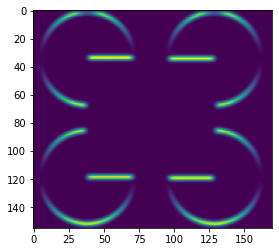

In [11]:
a=0
b=0
sum=0
for i in range(1, I.shape[0] + 1) :
    b = 0
    for j in range(1, I.shape[1] + 1) :
        sum=0
        x = i - 1
        for k in range(0, 3) :
            y = j - 1
            for l in range(0, 3) :
                sum += G[k][l] * Iy_sqr_PaddedImage[x][y]
                y = y + 1
            x = x + 1
        GIy_sqr[a][b] = sum
        b = b + 1
    a = a + 1 
plt.imshow(GIy_sqr)

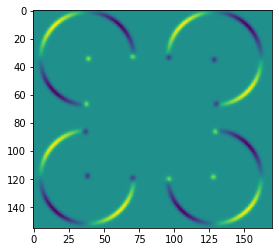

In [12]:
a=0
b=0
sum=0
for i in range(1, I.shape[0] + 1) :
    b = 0
    for j in range(1, I.shape[1] + 1) :
        sum=0
        x = i - 1
        for k in range(0, 3) :
            y = j - 1
            for l in range(0, 3) :
                sum += G[k][l] * Ix_Iy_PaddedImage[x][y]
                y = y + 1
            x = x + 1
        GIx_Iy[a][b] = sum
        b = b + 1
    a = a + 1 
plt.imshow(GIx_Iy)

In [36]:
cornernessImg = np.zeros((I.shape[0], I.shape[1]), dtype = np.float64)
for i in range(0, I.shape[0]):
    for j in range(0, I.shape[1]):
        StructureTensor = [[GIx_sqr[i,j],GIx_Iy[i,j]],[GIx_Iy[i,j],GIy_sqr[i,j]]]
        determinantM = np.linalg.det(StructureTensor)
        traceM = np.trace(StructureTensor)
        try:
            cornernessImg[i, j]=determinantM/traceM
        except:
            cornernessImg[i, j]=0

<ipython-input-36-7f578ea93441>:8: RuntimeWarning: invalid value encountered in double_scalars
  cornernessImg[i, j]=determinantM/traceM


In [34]:
cornernessImg = np.nan_to_num(cornernessImg)

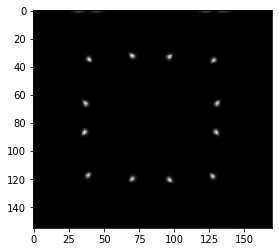

In [35]:
plt.imshow(cornernessImg,cmap="gray")